## Analise da serie temporal 01 - Cotacao do Dolar em relacao ao Real

In [27]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df_original = pd.read_csv('../output/timeseries01.csv', header=0, names=['date', 'rate'])

arima.print_dataframe_info(df_original)

SHAPE: (6225, 2)

DTYPES: date    object
rate    object
dtype: object

##########################################################################################
HEAD 

         date    rate
0  1995-01-02  0.8440
1  1995-01-03  0.8450
2  1995-01-04  0.8450
3  1995-01-05  0.8430
4  1995-01-06  0.8400


##########################################################################################
TAIL 

            date    rate
6220  2018-10-30  3.6964
6221  2018-10-31  3.7219
6222  2018-11-01  3.6967
6223  2018-11-02  3.6952
6224  2018-11-03  3.6952


In [29]:
df = df_original.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

arima.print_dataframe_info(df)

SHAPE: (6225, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
date              
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


In [30]:
df = df.resample('D').ffill() # esse comando jah executa o sort

arima.print_dataframe_info(df)

SHAPE: (8707, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
date              
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


In [31]:
df = df.replace(0, np.nan)
df = df.replace('.', np.nan)

print(df.isnull().values.any())

True


In [32]:
df = df.fillna(method='ffill')

print(df.isnull().values.any())

False


In [33]:
df.rate = pd.to_numeric(df.rate)

arima.print_dataframe_info(df)

SHAPE: (8707, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

             rate
date             
1995-01-02  0.844
1995-01-03  0.845
1995-01-04  0.845
1995-01-05  0.843
1995-01-06  0.840


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


Text(0.5,0,'Time')

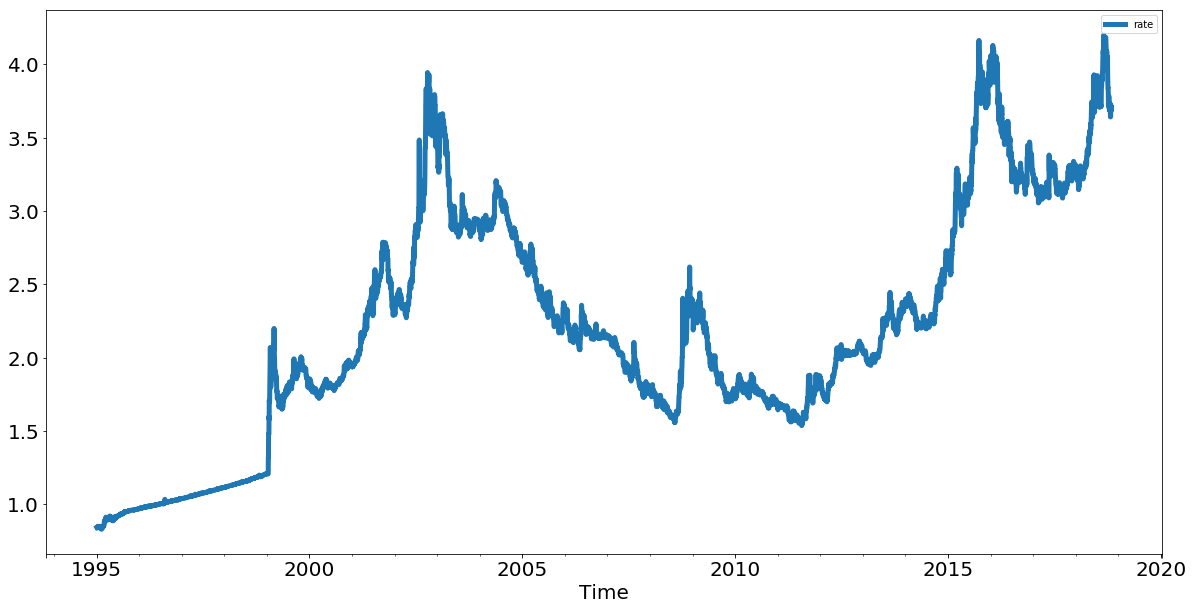

In [34]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

In [35]:
# removo o periodo inicial da serie temporal
# eh um padrao que nao se repete
df = df['1999-05-03':]

arima.print_dataframe_info(df)

SHAPE: (7125, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

             rate
date             
1999-05-03  1.668
1999-05-04  1.678
1999-05-05  1.686
1999-05-06  1.674
1999-05-07  1.672


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


Text(0.5,0,'Time')

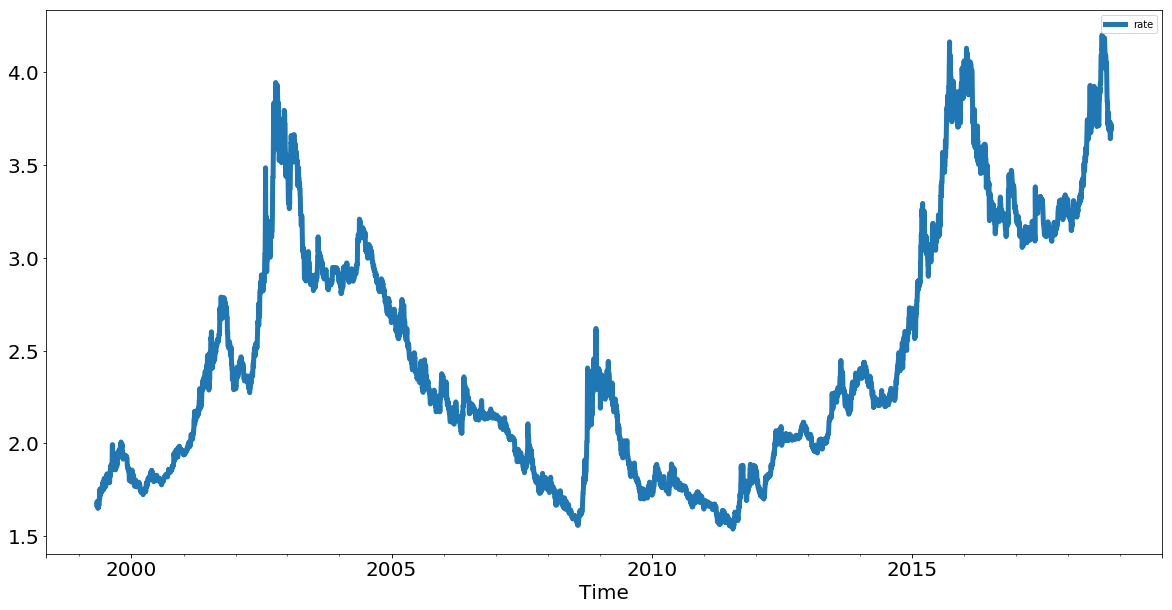

In [36]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

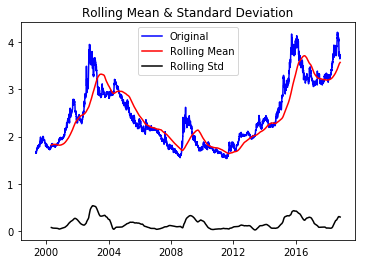

Results of Dickey-Fuller Test:
Test Statistic (-1.200394) > Critical Value 1 (-3.431272)
Test Statistic (-1.200394) > Critical Value 5 (-2.861948)
Test Statistic (-1.200394) > Critical Value 10 (-2.566987)
p-value (0.673426) > 0.05


In [37]:
timeseries.check_stationarity(df, window=365)

In [38]:
df_monthly = df.resample('M')
df_monthly = df_monthly.mean()

arima.print_dataframe_info(df_monthly)

SHAPE: (235, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

                rate
date                
1999-05-31  1.688879
1999-06-30  1.766217
1999-07-31  1.800516
1999-08-31  1.889952
1999-09-30  1.897017


##########################################################################################
TAIL 

                rate
date                
2018-07-31  3.823542
2018-08-31  3.924729
2018-09-30  4.105923
2018-10-31  3.758874
2018-11-30  3.695700


Text(0.5,0,'Time')

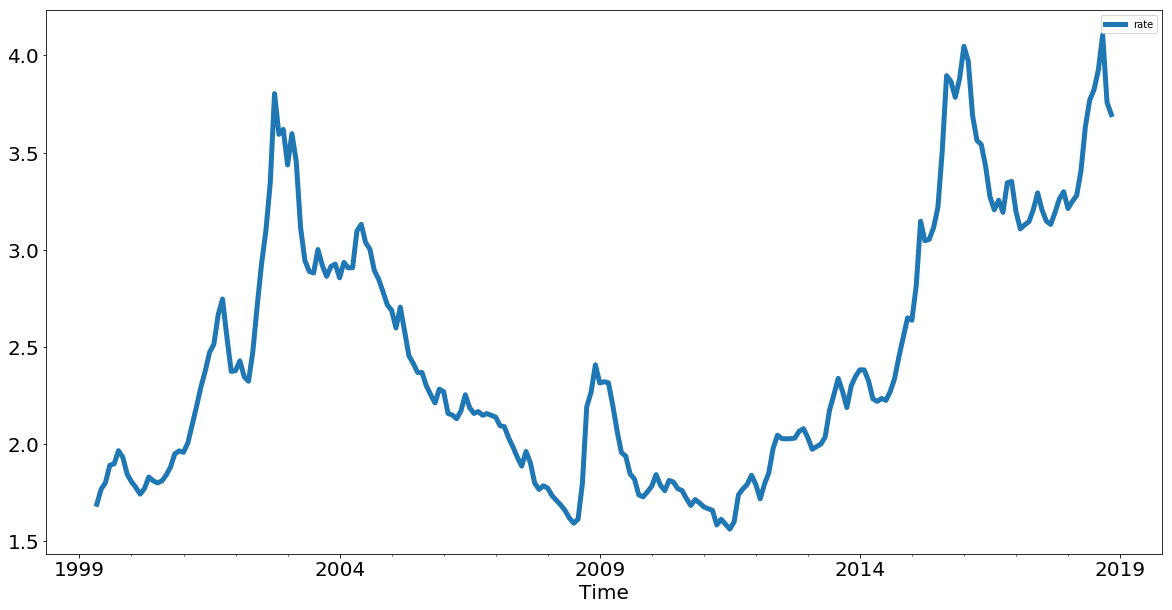

In [39]:
df_monthly.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

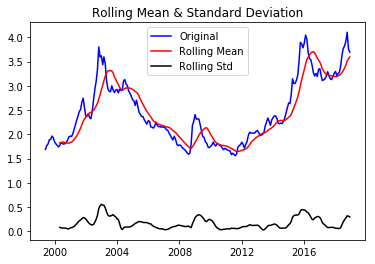

Results of Dickey-Fuller Test:
Test Statistic (-1.400226) > Critical Value 1 (-3.458731)
Test Statistic (-1.400226) > Critical Value 5 (-2.874026)
Test Statistic (-1.400226) > Critical Value 10 (-2.573424)
p-value (0.582168) > 0.05


In [40]:
timeseries.check_stationarity(df_monthly, window=12)

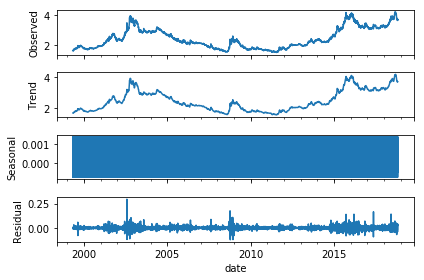

In [41]:
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

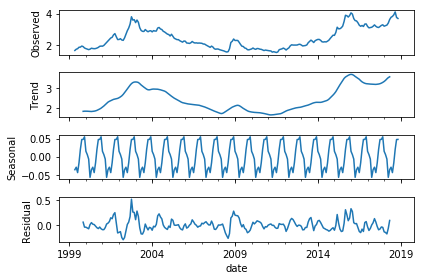

In [42]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()